<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/informe_3-MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimización**

**Entrada:** sucesión de n números [a<sub>1</sub>, a<sub>2</sub>, ..., a<sub>n</sub>].

**Salida:** subarreglo  **[a<sub>i</sub>, ... , a<sub>j</sub>]** tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

El tamaño del problema está determinado según la cantidad de elementos ***n*** que son ingresados. 

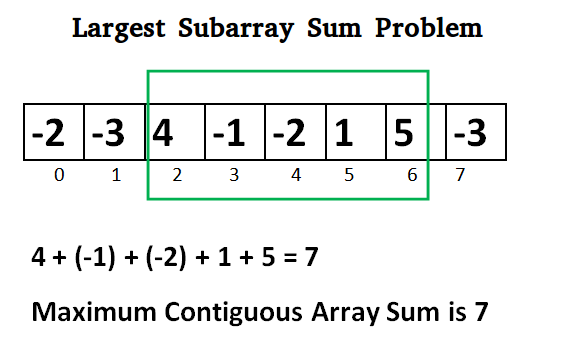


Desde el comienzo de la era tecnológica ha sido un tema a investigar el problema de optimización, uno de los pilares fundamentales al momento de programar y encontrar la mejor solución posible. A esta dificultad se le han propuesto diversos algoritmos como solución, como por ejemplo *Branch&Bound*, *Interior point method*, entre otros. En este informe hablaremos del problema del *sub-arreglo máximo* al cual se le aplicará la técnica de *divide y vencerás*. Un ejemplo de este problema se ve en si necesitamos calcular en qué época del año una empresa tiene las mejores ganancias.


# **2. Sub-arreglo máximo**


El siguiente código muestra la implementación de la función que llamaremos **MaxSubArrayMid**, la cual encontrará el sub-arreglo máximo de un arreglo que contenga el elemento *mid*, y la función **MaxSubArray**, la cual se ocupará de resolver el problema del *sub-arreglo máximo*, utilizando la técnica de *divide y vencerás*. 

## **2.1 Código**

In [2]:
import math
from termcolor import colored

# Función obtiene el máximo subarreglo que pasa por el medio.
def maxMidSubArray(array, mid, verbose):
  
  sum = 0 # Suma de elementos del subarreglo seleccionado
  maxLeft = -math.inf # Define como valor máximo izquierdo el infinito negativo
  posMin = 0  # Guarda la posición inicial del máximo subarreglo.

  # Se obtiene subArreglo más grande de la izquierda.
  for i in range(mid-1, -1, -1): # Se parte de mid -1, hasta el inicio (i = 0, no considera el -1) disminuyendo 1 en cada iteración
    sum = sum + array[i] # Se suma lo que estaba guardado en suma con la posición actual
    
    # Si se encuentra una suma más grande que la anterior guardada se reemplaza
    if (sum > maxLeft):
       maxLeft = sum
       posMin = i # Posición actual se guarda

  sum = 0
  maxRight = -math.inf # Define como valor máximo derecho el infinito negativo
  posMax = len(array)-1 # Guarda la posición final del máximo subarreglo.
  
  # Se obtiene el subarreglo máximo de la derecha.
  for i in range (mid, len(array)):
    sum = sum + array[i] 
    
    if (sum > maxRight):
      maxRight = sum
      posMax = i

  maxSum = maxLeft + maxRight # Se suman las dos mitades

  # Si verbose es True, se muestran el subarreglo mayor que cruza por el medio.
  if (verbose == True):
    
    if (len (array[posMin:posMax]) > 1):
      print ("Maximo Subarreglo que pasa por el medio: ", colored(f"{str(array[posMin: posMax-1])[1:-1]}","blue"), ",", colored(f"{str(array[posMax-1:posMax])[1:-1]}","blue"), "\n")
    
    else:
      print ("Máximo subarreglo que pasa por el medio: ", colored(f"{str(array[posMin: posMax])[1:-1]}","blue"), "\n")

  return ((maxLeft + maxRight), posMin, posMax)

# Función que obtiene el máximo subarreglo de manera recursiva.
def maxSubArray(array, posMin, posMax, verbose):
  n = len (array)

  # Caso base.
  if (n == 1):
    return (array[0], posMin, posMax)

  mid = len(array)//2

  # Subarreglo Izquierdo y derecho.
  leftArray = array[: mid] # No cuenta el elemento central
  rightArray = array[mid : ] # Cuenta el elemento central

  # Si verbose es True se muestran los subarreglos.
  if (verbose == True):
        print("SubArreglo Izquierdo: ", leftArray)
        print("SubArreglo Derecho: ", rightArray, "\n")

  # Se divide hasta tener los elementos individuales
  maxLeft, posMinLeft, posMaxLeft = maxSubArray(leftArray, 0, mid - 1, verbose) 
  maxRight, posMinRight, posMaxRight = maxSubArray(rightArray, mid, len(array) - 1, verbose)
  maxMid, posMinMid, posMaxMid = maxMidSubArray(array, mid, verbose)

  # Se obtiene la máxima suma.
  maxSum = max (maxLeft, maxRight, maxMid)

  if (maxSum == maxMid): 
    return maxSum, posMinMid, posMaxMid

  elif (maxSum == maxRight):
    return maxSum, posMinRight + n//2, posMaxRight + n//2

  elif (maxSum == maxLeft):
    return maxSum, posMinLeft, posMaxLeft

#Ejemplo
a = [-5, -7, 4, 1, 6, 1, 5, -3]
print("Arreglo de entrada: ", a, "\n")
b, i, j = maxSubArray(a, 0, len(a) - 1, verbose = False)
print ("\nLa suma máxima es: ", b)
print ("El arreglo comienza en la posición: ", i, " y termina en la posición ", j)

Arreglo de entrada:  [-5, -7, 4, 1, 6, 1, 5, -3] 


La suma máxima es:  17
El arreglo comienza en la posición:  2  y termina en la posición  6


## **2.2 Descripción del algoritmo**



El algoritmo recibe como entrada un arreglo o lista de ***n*** elementos, del cual se deberá encontrar el subarreglo que contenga la suma máxima posible entre los valores entregados. Este algoritmo se implementa de forma recursiva y tiene tres casos posibles:
1.  Caso base = el arreglo contiene solo un elemento (```if (n == 1):
    return (array[0], posMin, posMax)```). En este caso se retorna de forma inmediata la posición 0 del arreglo, la posición ```posMin``` y la posición ```posMax```, donde estaría el único elemento el cual sería la suma máxima, la posición inicial y la final. 

2. Recursividad: dividimos el arreglo en mitades y calculamos la suma máxima, caso que trabajaremos con la función *MaxSubArray*. 

3. Caso especial: en este caso la suma máxima se encuentra entre las dos mitades del arreglo (contiene el elemento ```mid```), caso que trabajaremos con la función *MaxSubArrayMid*. 



**MaxSubArray**

Como se mencionó anteriormente, este algoritmo recibe como entrada una lista o arreglo `array` con una cantidad de ***n*** elementos, donde tendrá que encontrar de forma recursiva el sub-arreglo que contenga la suma máxima. 

1. Divide el sub-arreglo en dos partes de largo n/2.
2. El paso 1 se repite hasta tener los elementos separados de forma individual.
3. Se busca el máximo sub-arreglo de cada mitad.
4. Se busca el máximo sub-arreglo que pasa por el **punto de división** del arreglo original, lo cual se realiza de manera lineal. 
5. Se comparan los tres sub-arreglos y se retorna el que tenga la suma máxima. 

Si la variable ```verbose``` es igual a ```True```, se muestra información detallada para observar lo que ocurre paso a paso en la función. 

**MaxSubArrayMid**

Esta función se encarga del caso especial mencionado anteriormente, en el cual tiene que encontrar el máximo sub-arreglo que pase por las dos mitades. Recibe como entrada el arreglo a ordenar (```array```), la posición central del arreglo (```mid```) y la variable ```verbose```, la cual se ocupa para ver los pasos dentro de la función.

1. Se recorre desde la mitad ```mid-1``` hasta el inicio, el cual se asigna como nuestro sub-arreglo izquierdo, y desde la mitad ```mid``` hasta el final, el cual se asigna como nuestro sub-arreglo derecho. Este paso es necesario para obtener la suma máxima en cada mitad. 
2. Se suman ambas partes y así obtener el sub-arreglo máximo que pasa por el punto de división.  
3. Se retorna la suma del sub-arreglo, la posición inicial y final de este. 

## **2.3 Ejemplo**
En la siguiente imagen vemos dos ejemplos del algoritmo *dividir y vencerás* para resolver el problema del sub-arreglo máximo.

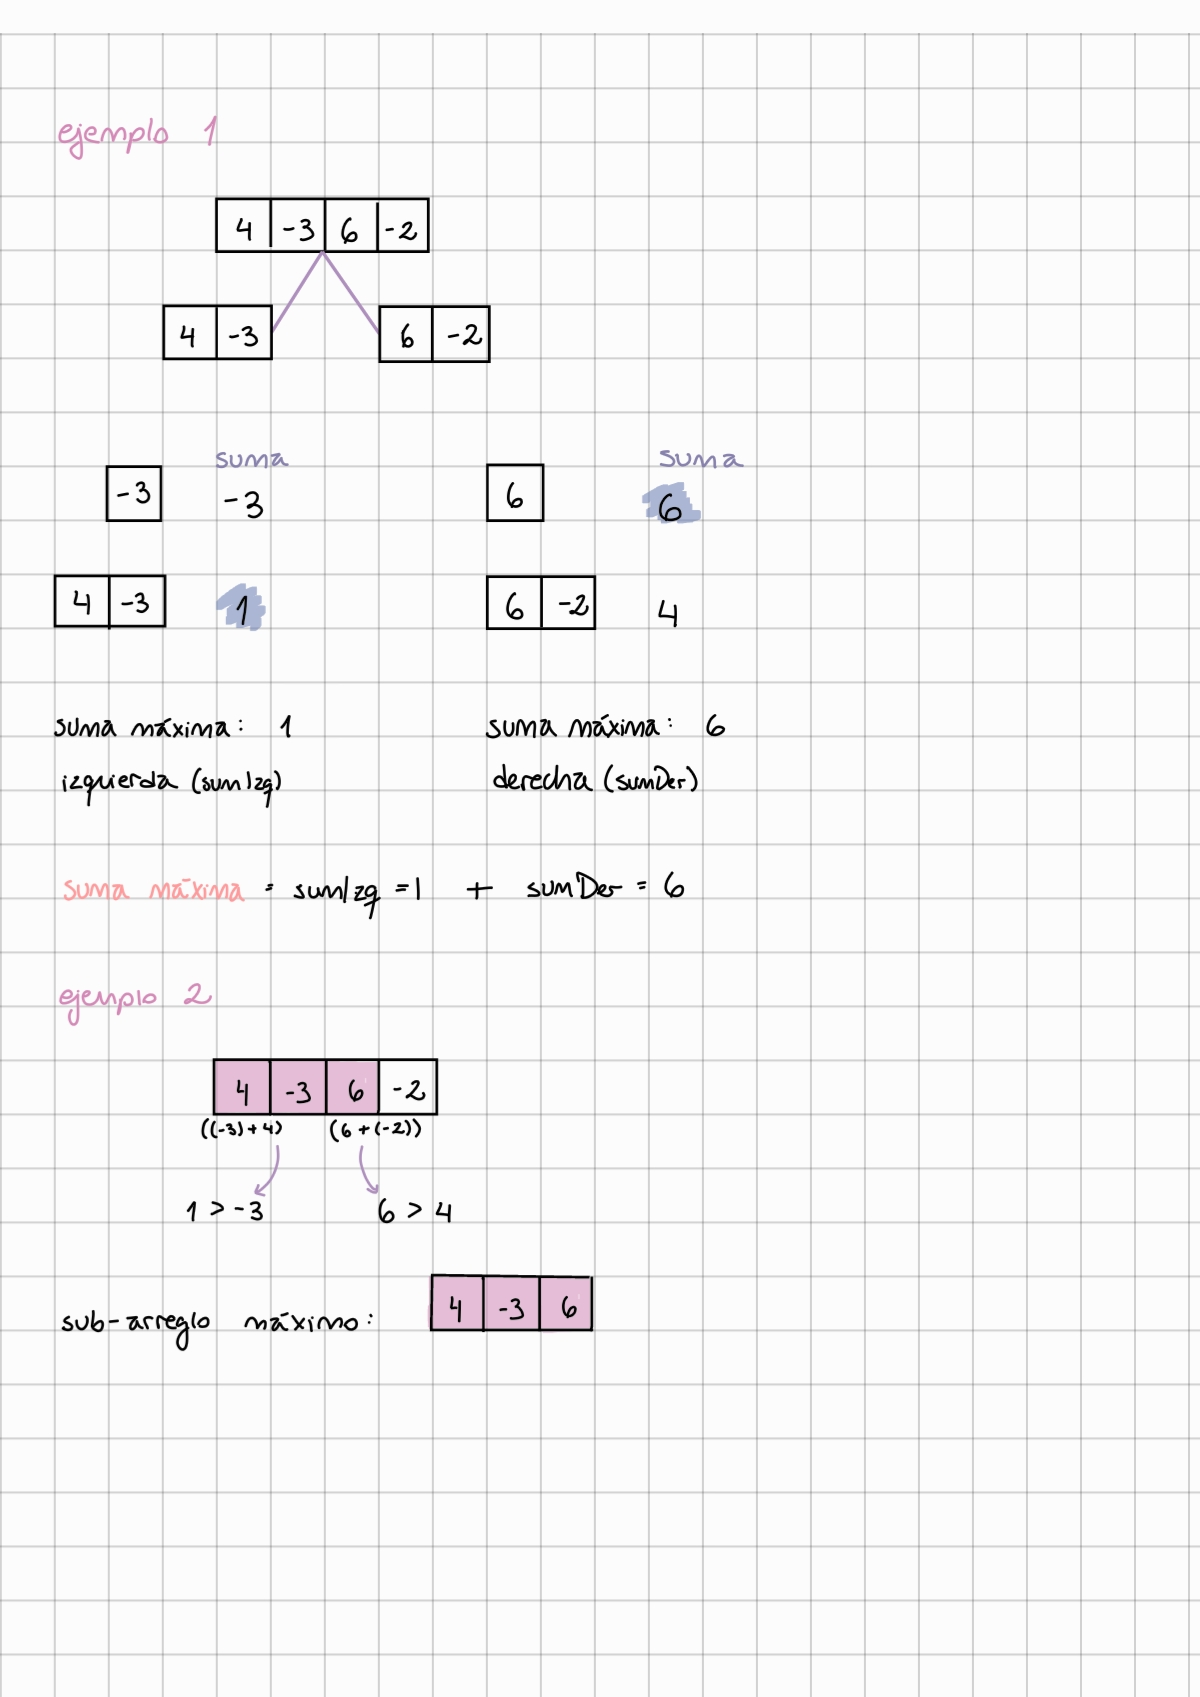

## **2.4 Ejecución del algoritmo paso a paso (verbose = True)**

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [15]:
import random
a = random.sample(range(1, 100), 6)
print("Arreglo de entrada: ", a, "\n")
sum, i, j = maxSubArray(a, 0, len(a) - 1, verbose = True)  
print("El máximo sub-arreglo es: ", a[i:j+1])

Arreglo de entrada:  [46, 65, 45, 25, 94, 26] 

SubArreglo Izquierdo:  [46, 65, 45]
SubArreglo Derecho:  [25, 94, 26] 

SubArreglo Izquierdo:  [46]
SubArreglo Derecho:  [65, 45] 

SubArreglo Izquierdo:  [65]
SubArreglo Derecho:  [45] 

Máximo subarreglo que pasa por el medio:  65 

Maximo Subarreglo que pasa por el medio:  46 , 65 

SubArreglo Izquierdo:  [25]
SubArreglo Derecho:  [94, 26] 

SubArreglo Izquierdo:  [94]
SubArreglo Derecho:  [26] 

Máximo subarreglo que pasa por el medio:  94 

Maximo Subarreglo que pasa por el medio:  25 , 94 

Maximo Subarreglo que pasa por el medio:  46, 65, 45, 25 , 94 

El máximo sub-arreglo es:  [46, 65, 45, 25, 94, 26]


# **3. Tiempo de ejecución**

## **Teorema (tiempo de ejecución)**
El algoritmo MaxSubArray tiene un tiempo de ejecución de $O(n log(n))$ en todos los casos, esto se debe a que independiente del tamaño del problema, este siempre realizará la misma cantidad de operaciones, ya que utiliza el paradigma de *Divide y vencerás*. 

## **Prueba del teorema: Inducción matemática**



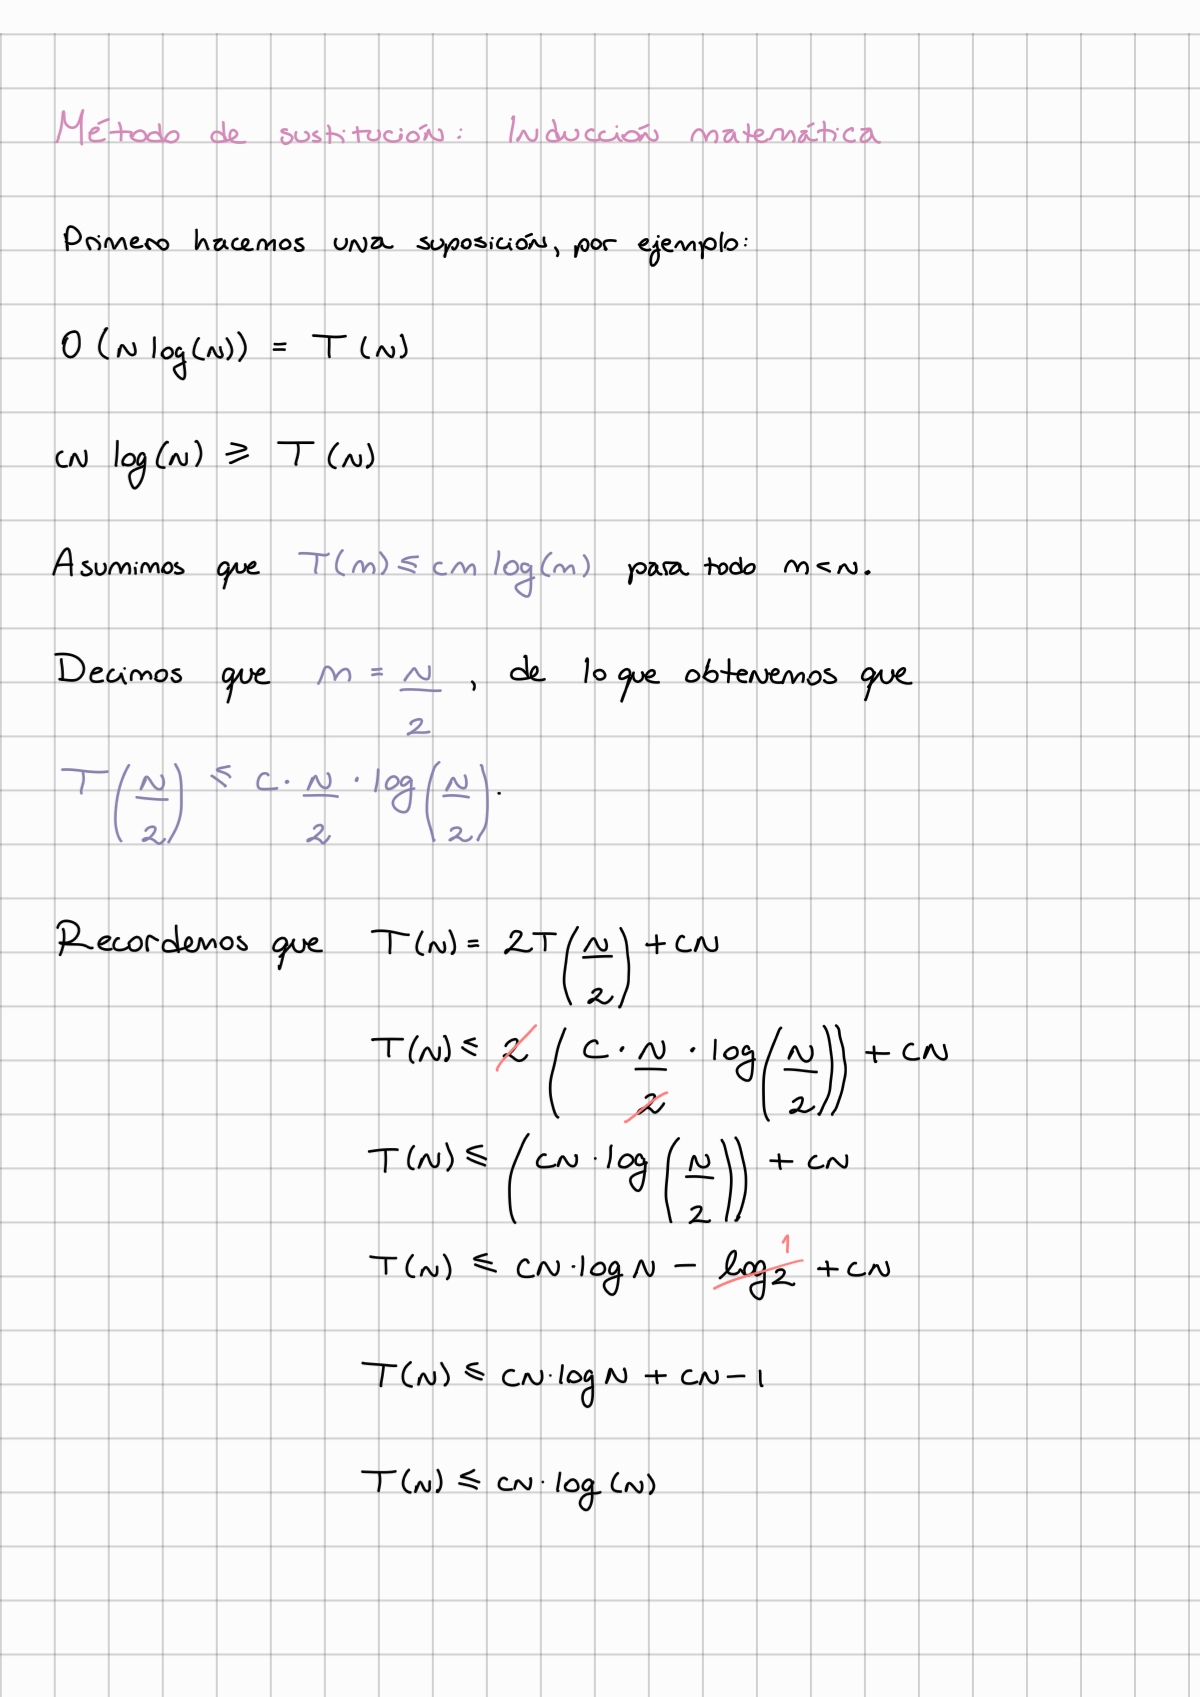

## **Prueba del teorema: Árbol de recursión**

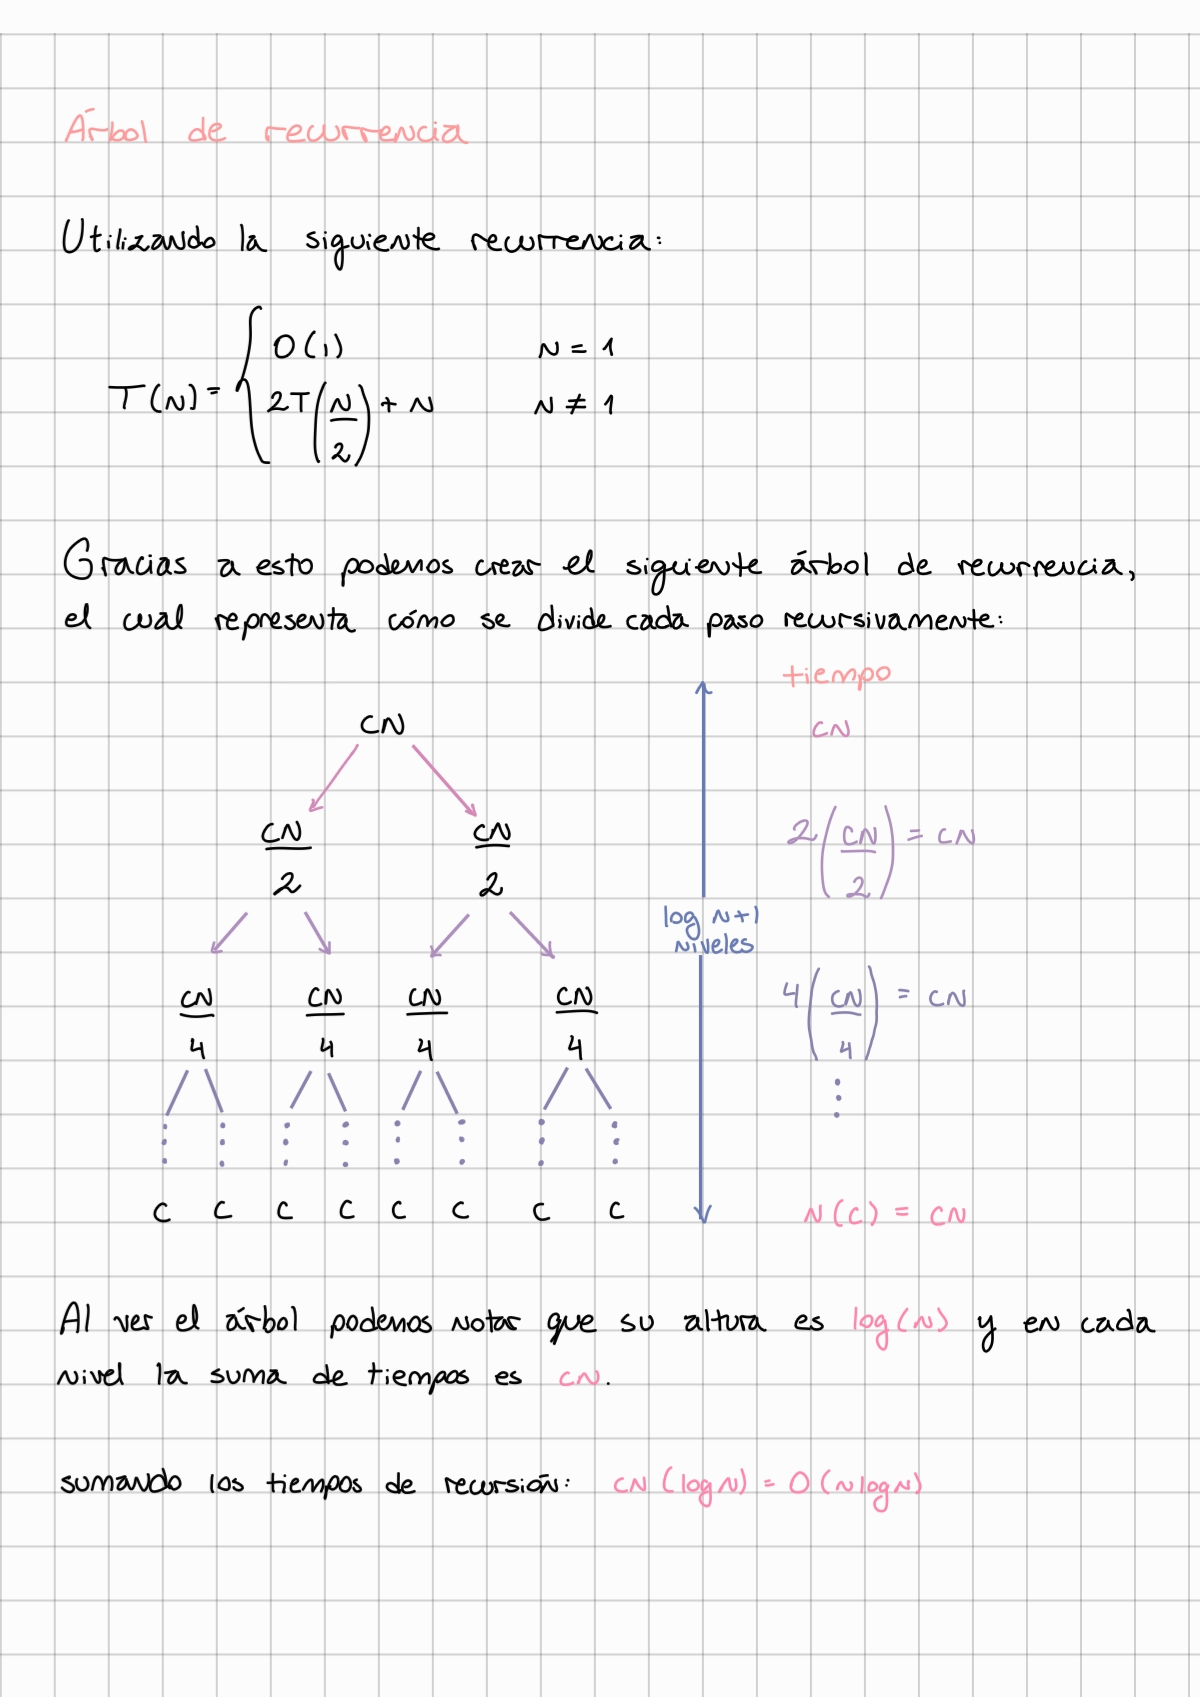

## **Prueba del teorema: Teorema Maestro**

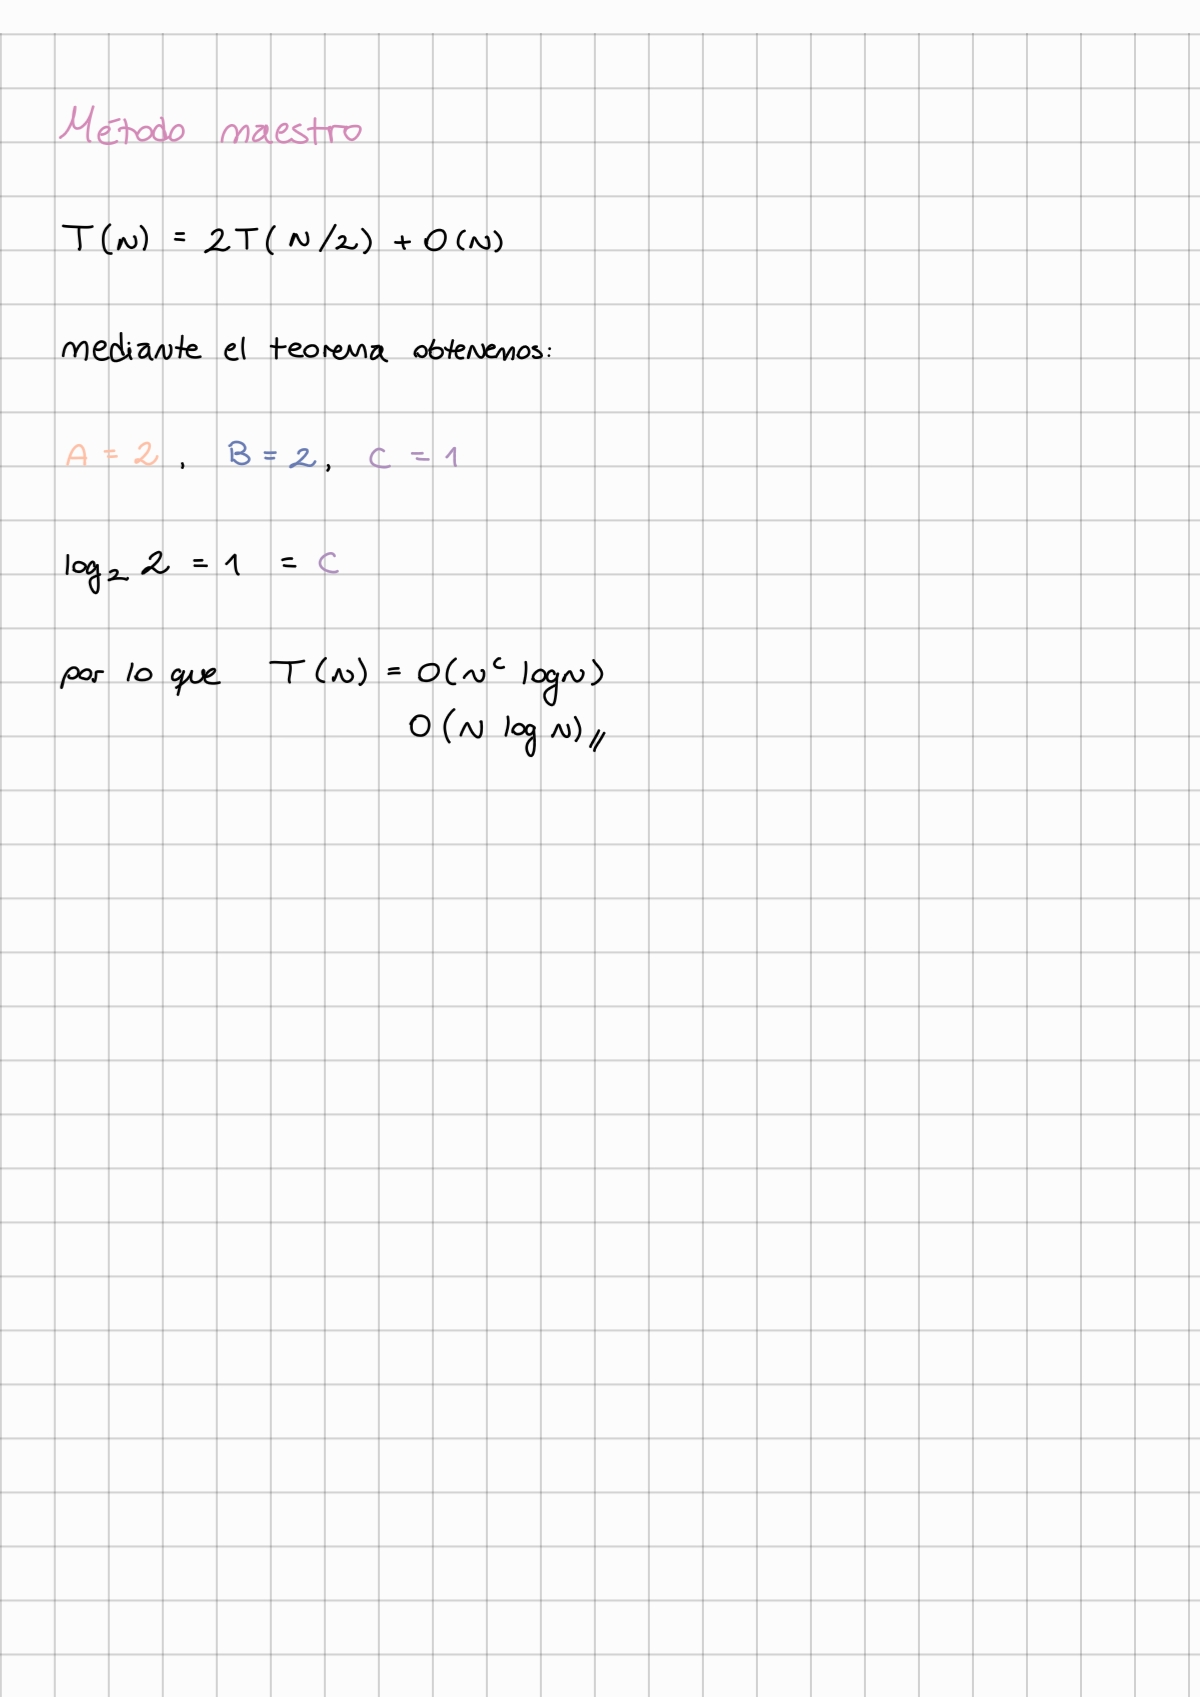

# **4. Correctitud**

##**Teorema (Correctitud).**

El algoritmo **maxSubarray** genera un arreglo de tamaño menor o igual al original, otorgando la suma máxima encontrada en el arreglo.

Para comprobar el teorema utilizaremos la *inducción matemática* (maxSubarray) y la propiedad del *bucle invariante* (maxMidSubarray).

### **Bucle invariante (maxMidSubArray)**

Propiedad invariante de bucle: Para cada iteración, las variables ```maxLeft``` y ```maxRight``` contienen la máxima suma del arreglo hasta la posición i-ésima. 

* **Inicialización**: En un comienzo la variable que contiene la suma máxima es igual al infinito negativo, ya que no hemos recorrido ningún elemento del arreglo. Al momento de comenzar la iteración los indices comienzan desde ```i = mid - 1``` en el subarreglo izquierdo y ```i = mid``` en el derecho. El primer elemento a comparar siempre será mayor, por lo que se le asigna este valor a la suma máxima del sub-arreglo que estemos recorriendo ```maxLeft``` o ```maxRight```.

* **Mantención**: Al estar en la iteración i-ésima el valor de la suma máxima siempre será el mayor. Se compara la suma hasta el elemento i-ésimo y si esta es mayor que el valor guardado en la suma máxima se actualiza el valor, de lo contrario se mantiene la suma máxima guardada anteriormente.

* **Finalización**: El bucle termina al recorrer cada sub-arreglo por completo. Para obtener el arreglo máximo que pasa por el medio se suman los valores de las variables `(maxSum = maxLeft + maxRight)`, con lo que obtenemos el arreglo con la suma máxima que cruza por el punto de división del arreglo original.

### **Inducción matemática (maxSubArray)**

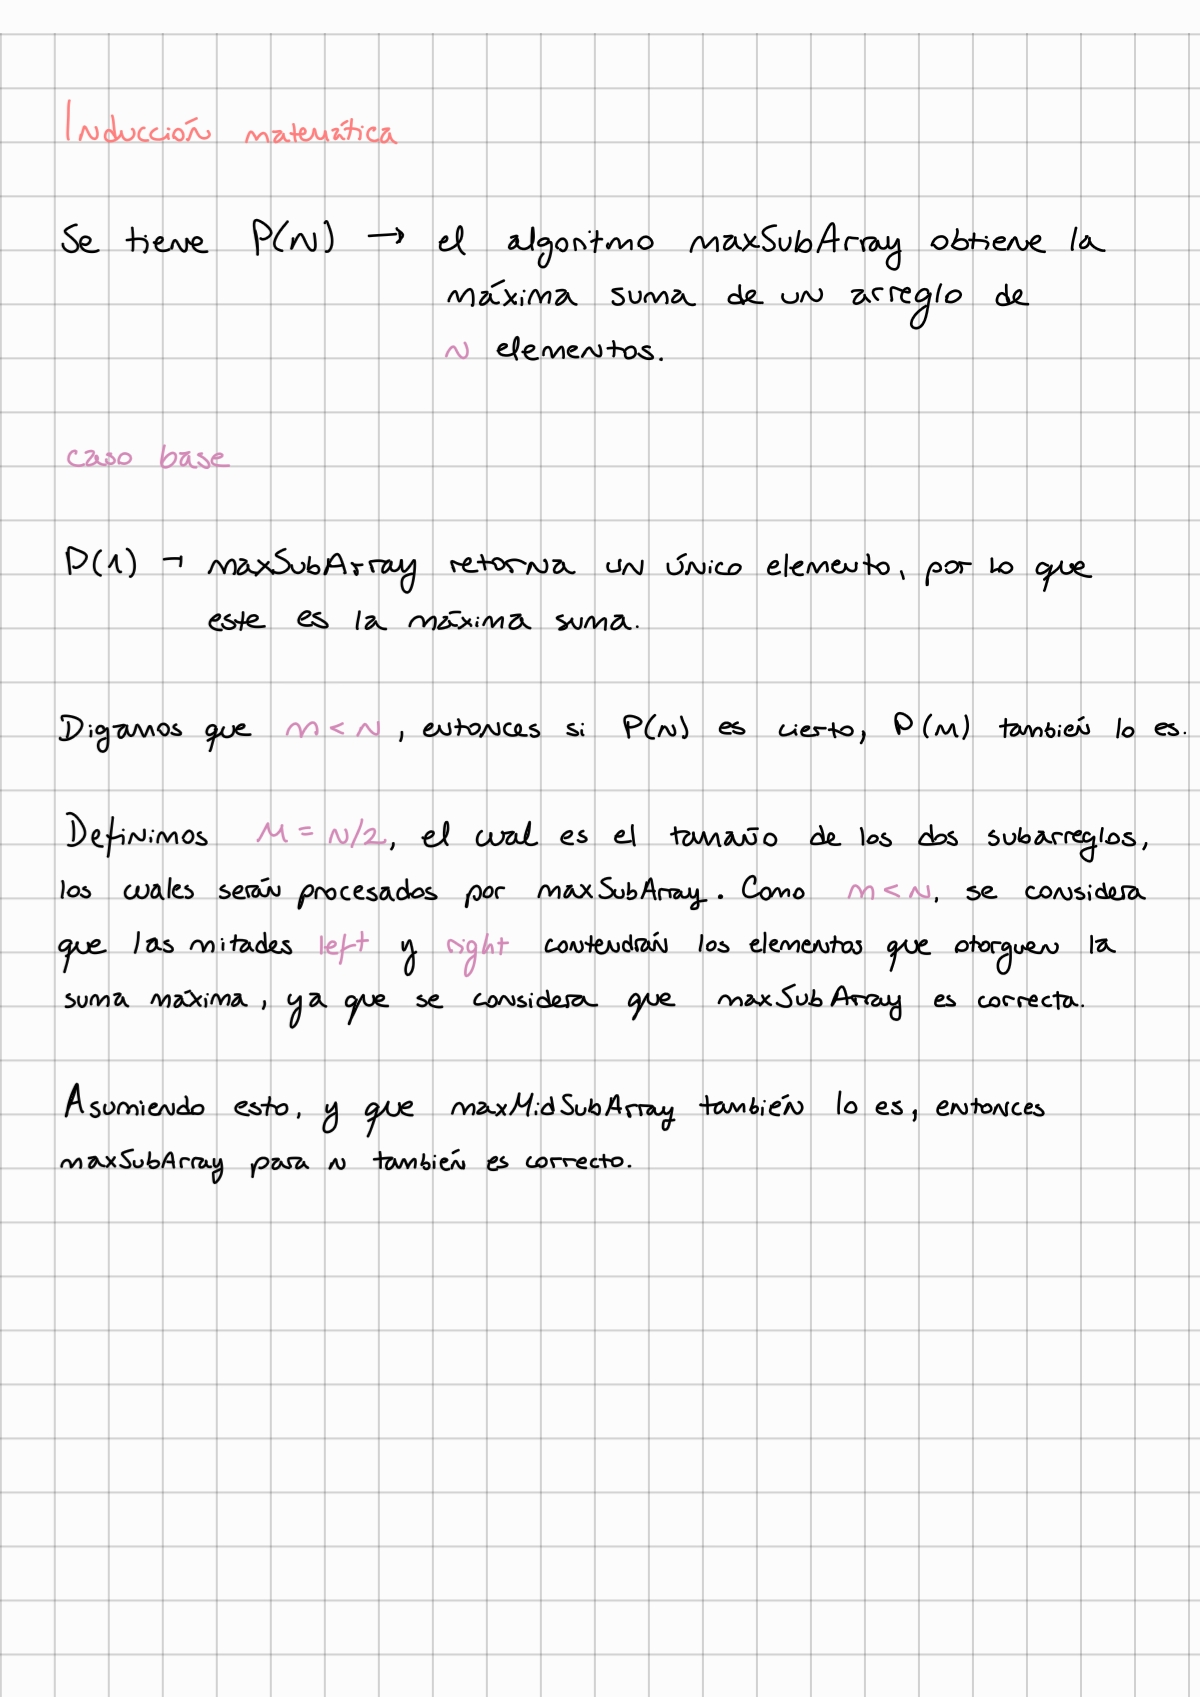

# **5. Experimentos**

## **5.1 Comparación tiempo de ejecución Dividir y vencerás v/s  Algoritmo de Kadane**
En el siguiente gráfico se muestra el tiempo de ejecución de los algoritmos *Dividir y vencerás* y el *Algoritmo de Kadane*. Para este experimento generamos arreglos de tamaño aleatorio, entre el rango de 5 y 500.

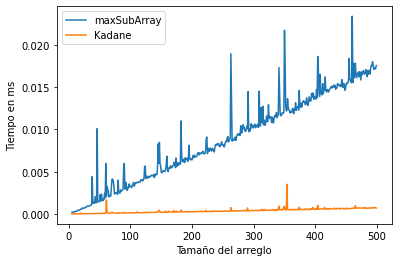

In [4]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def Kadane(a,size):
      
    max_so_far = a[0]
    max_ending_here = 0
      
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if max_ending_here < 0:
            max_ending_here = 0
          
        elif (max_so_far < max_ending_here):
            max_so_far = max_ending_here
              
    return max_so_far

x=[]; y=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(1, 500), n)
  verbose = False
  posMin = 0
  posMax = len(a)-1

  #la función repeat está ejecutando 20 veces maxSubArray/Kadane con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{posMin}, {posMax},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import Kadane", stmt=f"Kadane({a},{n})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["maxSubArray", "Kadane"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Como se puede apreciar en el gráfico, el *algoritmo de Kadane* supera con creces respecto a eficiencia al algoritmo *Dividir y vencerás*, sin importar el tamaño del arreglo con el que estemos trabajando. Esto se debe al tiempo de ejecución que tiene *Kadane*, el cual es lineal y se expresa como $O(n)$. En comparación, *Divide y vencerás* tiene un tiempo de ejecución logarítmico y se expresa como $O(nlogn)$. 

## **5.2 Comparación tiempo de ejecución Dividir y vencerás v/s Fuerza bruta**

En el siguiente gráfico se muestra el tiempo de ejecución de los algoritmos *Dividir y vencerás* y el algoritmo de *fuerza bruta*. Para este experimento generamos arreglos de tamaño aleatorio, entre el rango de 5 y 500.

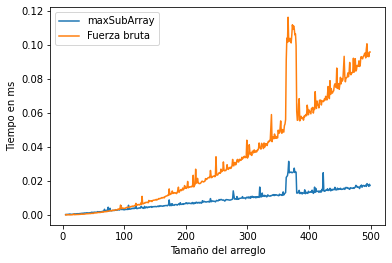

In [13]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def max_Summ(a):
    max_sum = 0
    k=0
    for i in a:
        temp_sum = 0
        for j in a[k::]:
            temp_sum=temp_sum+j
            if temp_sum>max_sum:
                max_sum=temp_sum
        k=k+1
    return max_sum

x=[]; y=[]; y1=[]

for n in range(5,500):

  a = random.sample(range(1, 500), n)
  verbose = False
  posMin = 0
  posMax = len(a)-1

  #la función repeat está ejecutando 20 veces MergeSort/InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a},{posMin}, {posMax},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import max_Summ", stmt=f"max_Summ({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["maxSubArray", "Fuerza bruta"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Como se puede apreciar en el gráifco, si bien el algoritmo *divide y vencerás* no es mejor que el *algoritmo de Kadane* sí supera en eficiencia al algoritmo de *fuerza bruta*. Esto se debe a que *divide y vencerás* tiene un tiempo de ejecución logarítmico y se expresa como $O(nlogn)$. Por otra parte, el algoritmo de fuerza bruta tiene un tiempo de ejecución cuadrático y se expresa como $O(n^2)$. 

Además, se puede apreciar un *spike* en el *tiempo en ms* entre arreglos de tamaño 350 y 400 en ambos algoritmos, cosa que se puede atribuir a lo impredecible de los procesadores. Lo que se puede diferenciar es que afecta de mayor manera en el algoritmo de *fuerza bruta* que en *divide y vencerás*. 